In [1]:
import numpy as np      

In [4]:
speed = [86,87,88,86,87,85,86]
#中位数 将数据排序后处于中间的数，如果有两个则是他们相加处以2   
print(np.median(speed))
#标准差 数据的平均值/2   
print(np.std(speed))
#方差 每个数据减去平均值再平方的和的平均值    
print(np.var(speed)) 

86.0
0.9035079029052513
0.8163265306122449


In [ ]:
#百分位数 百分之多少的人小于多少岁
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31] 
print(np.percentile(ages,75))    

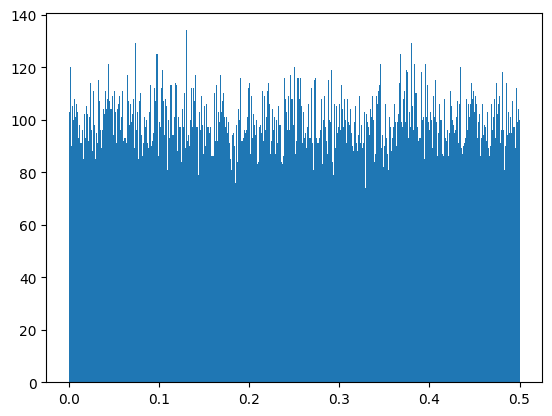

In [5]:
#创建介于0和0.5之间250个随机数 指定平均值为0.0  和标准差为0.5 
import matplotlib.pyplot as plt
x=np.random.uniform(0.0,0.5,100000)
plt.hist(x,1000)
plt.show()

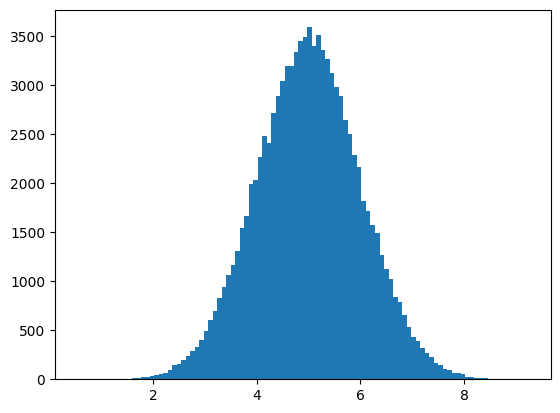

In [6]:
#创建介于5和1.0之间100000个随机数 指定平均值为5.0  和标准差为1
x=np.random.normal(5.0,1.0,100000)
plt.hist(x,100)
plt.show()

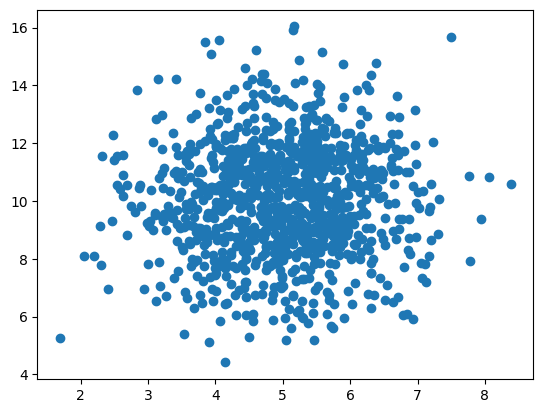

In [7]:
#绘制散点图
x=np.random.normal(5.0,1.0,1000)
y=np.random.normal(10.0,2.0,1000)
plt.scatter(x, y)
plt.show()

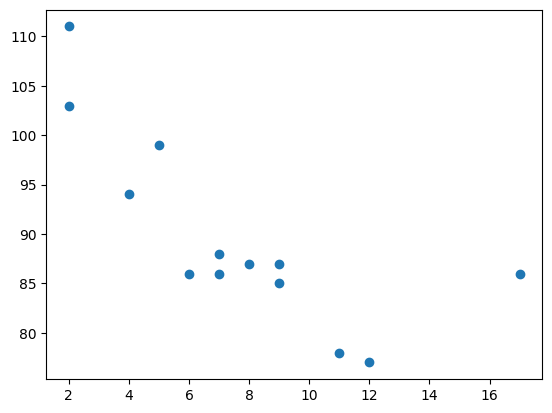

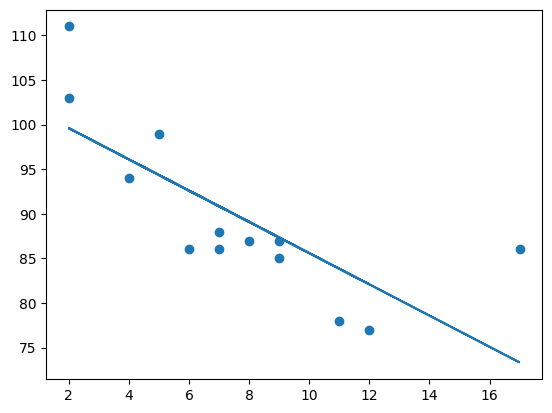

In [8]:
from scipy import stats
#绘制正态分布
#创建x轴和y轴的数组
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
plt.scatter(x, y)
plt.show()
#创建线性回归的线
slope, intercept, r, p, std_err = stats.linregress(x, y)
#定义函数，返回相应的x的值在线中的y值
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [9]:
#想测试我的数据在线性回归的拟合性如何
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)
#-0.75表示存在关系，但是并不完美

-0.7585915243761551


In [11]:
#预测未来值
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
#预测10年车龄的速度
speed=myfunc(7)
print(speed)

90.84694628403237


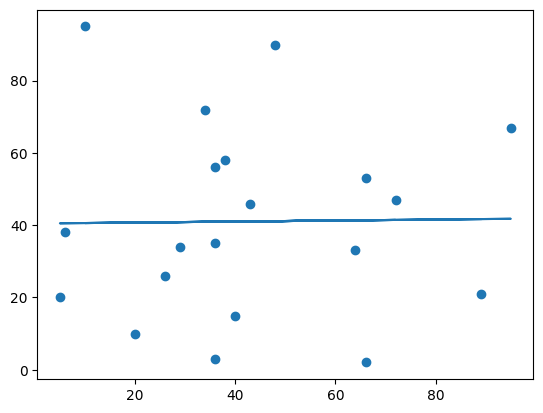

In [12]:
#x 轴和 y 轴的这些值应导致线性拟合非常糟糕 回归：
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [13]:
#得到的r的值会非常低
print(r)

0.01331814154297493


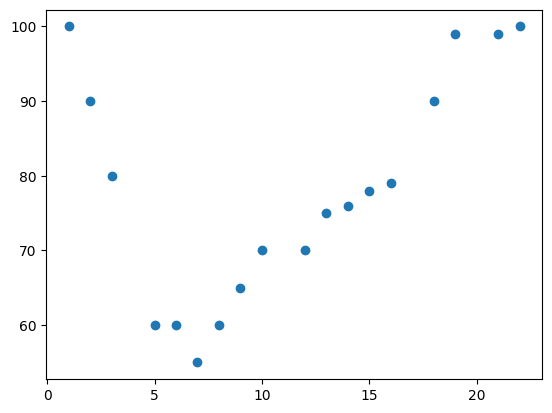

In [15]:
#如果测试的结果非常不适合线性回归，那么我们可以试试多项式回归
#先绘制散点图
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
plt.scatter(x, y)
plt.show()

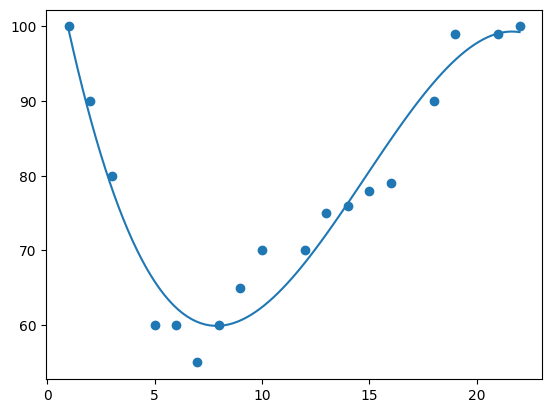

In [16]:
#创建多项式模型
mymodel= np.poly1d(np.polyfit(x, y, 3))
#指定线条的显示方式
myline = np.linspace(1, 22, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [17]:
#了解 x 轴和 y 轴是，如果没有关系，则 多项式 回归不能用于预测任何内容。
#这种关系是用一个称为 r 平方的值来衡量的。
#r 平方值的范围是 0 到 1，其中 0 表示没有关系，而 1 表示 100% 相关。
#Python 和 Sklearn 模块将为您计算此值，您只需 do 是向它提供 x 和 y 数组：
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(x, y, 3))
print(r2_score(y, mymodel(x)))
#预测结果0.94，表示非常适合用多项式回归

0.9432150416451025


In [18]:
#预测未来值
print(mymodel(17))

88.87331269697975


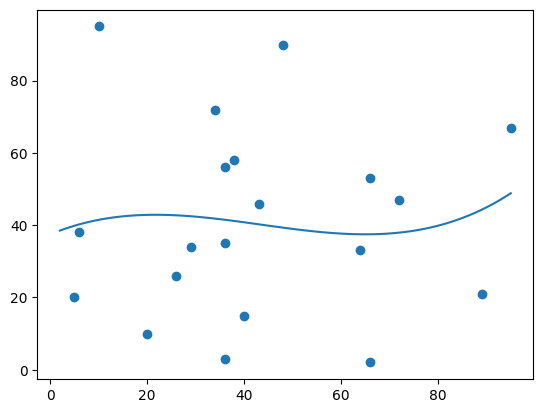

In [21]:
#创建一个示例，其中多项式回归不是最佳方法 预测未来值。
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(2, 95, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [22]:
#表示关系非常差，并告诉我们该数据集不适合多项式回归。
print(r2_score(y, mymodel(x)))

0.009952707566680541
